Please refer to the assignment synthetic dataset. This dataset is composed of two features
belonging to certain species. The goal is refining the data about these species such that
classes of species and their features can be used to classify the data input from new
observations.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn import tree
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [2]:
data = pd.read_csv('synthetic_clustering_dataset.csv')
data

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937
...,...,...
745,0.505927,1.213927
746,-1.640461,-0.469973
747,-0.057139,-0.909261
748,-1.169394,0.039597


## 1. [10 pts] How many species must be there in the dataset? (For the rest of this assignment, use that number as the number-of-clusters parameter in methods such as KMeans)

<AxesSubplot:xlabel='f1', ylabel='f2'>

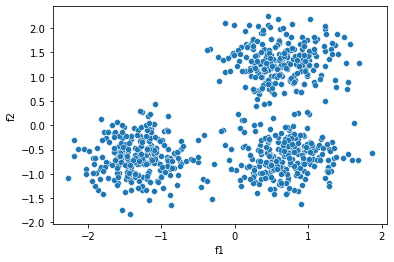

In [3]:
sea.scatterplot(data=data, x='f1', y='f2')

### Just based off a simple scatterplot, it is pretty obvious there are three species

## 2. [10 pts] Find the rough feature ranges to classify these species correctly. It might be a good idea to do this step visually from some data plots. We will clean the points that are around the boundaries of the cluster (these points might be due to errors, anomalies, or they are simply outliers). This step is done to refine feature boundaries so that a scientist can classify the species manually, reliably, and with a high-level generalization. (An example statement, "Species 1 has feature 1 in the range of [0-1.5]")


I will be keeping in the points around the boundaries and use Question 3 and 4 to remove them. <br>
The rough ranges are: <br>
Species 1: f1 [-2, -0.3] f2 [-2, 0.5] <br>
Species 2: f1 [-0.3, 2] f2 [-2, 0.4] <br>
Species 3: f1 [-0.4, 1.9] f2 [0.4, 2.5]

## 3. [20 pts] Use K-means clustering to find anomalies (Hint: find cluster data points that are far to the centroids).

<AxesSubplot:xlabel='f1', ylabel='f2'>

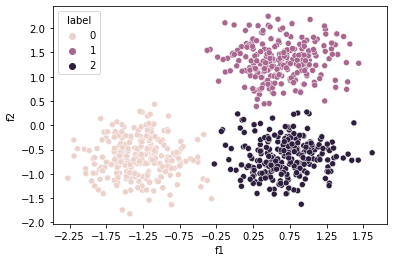

In [4]:
kmeansData = data.copy()
kmeans = KMeans(n_clusters=3, random_state=0).fit(kmeansData)
kmeansData['label'] = kmeans.labels_
plt.xticks(np.arange(-2.25, 2, 0.5))
kmeansPlot = sea.scatterplot(data=kmeansData, x='f1', y='f2', hue='label')
kmeansPlot

In [5]:
centers = kmeans.cluster_centers_
centers

array([[-1.30266211, -0.65704205],
       [ 0.62260555,  1.3172598 ],
       [ 0.6954587 , -0.64442334]])

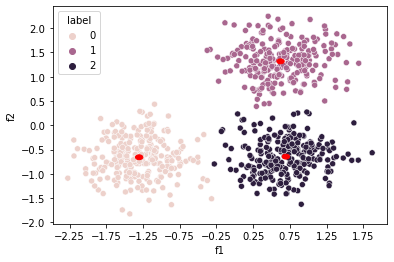

In [6]:
plt.xticks(np.arange(-2.25, 2, 0.5))
kmeansPlt = sea.scatterplot(data=kmeansData, x='f1', y='f2', hue='label')
circle1 = plt.Circle(xy=(centers[0][0], centers[0][1]), radius=.05, color='red', fill=True)
circle2 = plt.Circle(xy=(centers[1][0], centers[1][1]), radius=.05, color='red', fill=True)
circle3 = plt.Circle(xy=(centers[2][0], centers[2][1]), radius=.05, color='red', fill=True)
kmeansPlt.add_patch(circle1)
kmeansPlt.add_patch(circle2)
kmeansPlt.add_patch(circle3)

In [7]:
species0 = kmeansData[kmeansData['label'] == 0]
species1 = kmeansData[kmeansData['label'] == 1]
species2 = kmeansData[kmeansData['label'] == 2]
species0['outlier'] = IsolationForest(random_state=0).fit_predict(species0)
species1['outlier'] = IsolationForest(random_state=0).fit_predict(species1)
species2['outlier'] = IsolationForest(random_state=0).fit_predict(species2)

<ipython-input-7-53f5da17720f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species0['outlier'] = IsolationForest(random_state=0).fit_predict(species0)
<ipython-input-7-53f5da17720f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species1['outlier'] = IsolationForest(random_state=0).fit_predict(species1)
<ipython-input-7-53f5da17720f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

<AxesSubplot:xlabel='f1', ylabel='f2'>

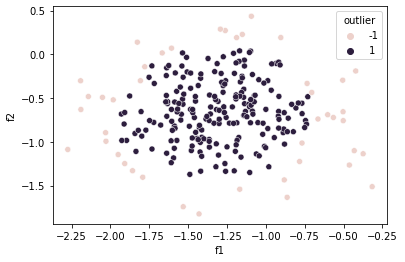

In [8]:
sea.scatterplot(data=species0, x='f1', y='f2', hue='outlier')

<AxesSubplot:xlabel='f1', ylabel='f2'>

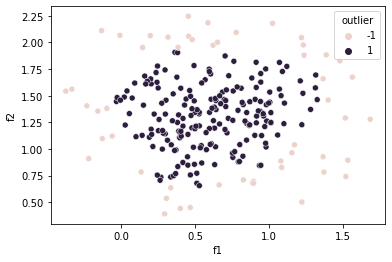

In [9]:
sea.scatterplot(data=species1, x='f1', y='f2', hue='outlier')

<AxesSubplot:xlabel='f1', ylabel='f2'>

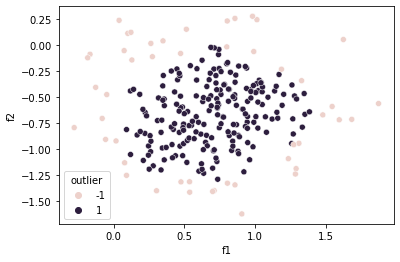

In [10]:
sea.scatterplot(data=species2, x='f1', y='f2', hue='outlier')

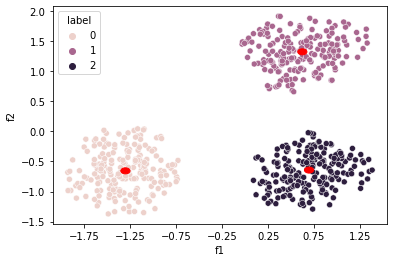

In [11]:
pruned = species0.append(species1.append(species2))
pruned = pruned[pruned['outlier'] == 1]
plt.xticks(np.arange(-2.25, 2, 0.5))
outlierPlt = sea.scatterplot(data=pruned, x='f1', y='f2', hue='label')
circle1 = plt.Circle(xy=(centers[0][0], centers[0][1]), radius=.05, color='red', fill=True)
circle2 = plt.Circle(xy=(centers[1][0], centers[1][1]), radius=.05, color='red', fill=True)
circle3 = plt.Circle(xy=(centers[2][0], centers[2][1]), radius=.05, color='red', fill=True)
outlierPlt.add_patch(circle1)
outlierPlt.add_patch(circle2)
outlierPlt.add_patch(circle3)

In [12]:
pruned.shape

(607, 4)

## 4. [20 pts] Use DBSCAN clustering to find anomalies in the full dataset as an alternative to (Q4.).

<AxesSubplot:xlabel='f1', ylabel='f2'>

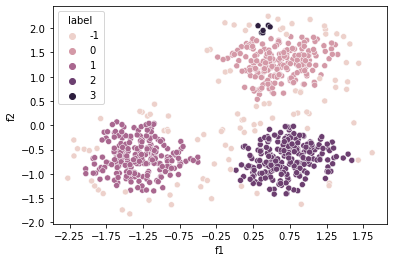

In [13]:
dbscan = data.copy()
cluster = DBSCAN(eps=.15, min_samples=5).fit(dbscan)
dbscan['label'] = cluster.labels_
plt.xticks(np.arange(-2.25, 2, 0.5))
sea.scatterplot(data=dbscan, x='f1', y='f2', hue='label')

<AxesSubplot:xlabel='f1', ylabel='f2'>

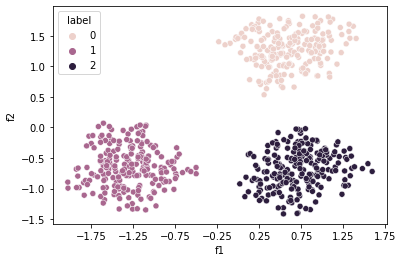

In [14]:
dbscan = dbscan[dbscan['label'] != -1]
dbscan = dbscan[dbscan['label'] != 3]
plt.xticks(np.arange(-2.25, 2, 0.5))
sea.scatterplot(data=dbscan, x='f1', y='f2', hue='label')

In [15]:
dbscan.shape

(643, 3)

## 5. [30 pts] Now using the cleaned dataset by a method of your choice (i.e., Q3. or Q4.), develop a decision tree classifier to model the species and show the model decision tree.

I am going to use the dbscan clustering because there are more data points and the clusters are still very well defined.

[Text(200.88000000000002, 181.2, 'X[1] <= 0.346\ngini = 0.666\nsamples = 430\nvalue = [142, 140, 148]'),
 Text(133.92000000000002, 108.72, 'X[0] <= -0.244\ngini = 0.5\nsamples = 288\nvalue = [0, 140, 148]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 140\nvalue = [0, 140, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 148\nvalue = [0, 0, 148]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 142\nvalue = [142, 0, 0]')]

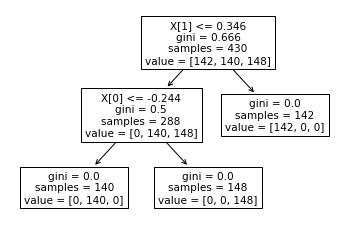

In [16]:
X = dbscan.iloc[:,:2]
y = dbscan.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [17]:
removedPredictions = clf.predict(X_test)
CM = confusion_matrix(y_test, removedPredictions)
AC = accuracy_score(y_test, removedPredictions)
F1 =f1_score(y_test, removedPredictions, average='weighted')
print(f'Accuracy: {AC}, F1: {F1}\nTP: {CM[0][0]}, TN: {CM[1][1]}, FP: {CM[0][1]}, FN: {CM[1][0]}')

Accuracy: 1.0, F1: 1.0
TP: 63, TN: 77, FP: 0, FN: 0


Not necessarily overfit because the clusters are very well defined.

## 6. [10 pts] Show that, in fact, it helped to clean the outliers as above, before generating the decision tree.

I am going to used the unpruned kmeans data for this comparison.

In [18]:
unpruned = KMeans(n_clusters=3, random_state=0).fit(data)
data['label'] = unpruned.labels_

[Text(200.88000000000002, 181.2, 'X[1] <= 0.339\ngini = 0.667\nsamples = 502\nvalue = [164, 170, 168]'),
 Text(133.92000000000002, 108.72, 'X[0] <= -0.298\ngini = 0.5\nsamples = 332\nvalue = [164, 0, 168]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 164\nvalue = [164, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 168\nvalue = [0, 0, 168]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 170\nvalue = [0, 170, 0]')]

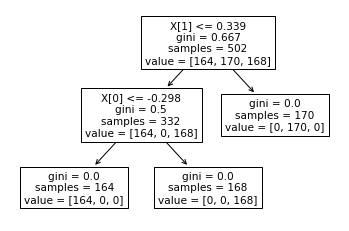

In [19]:
X = data.iloc[:,:2]
y = data.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [20]:
removedPredictions = clf.predict(X_test)
CM = confusion_matrix(y_test, removedPredictions)
AC = accuracy_score(y_test, removedPredictions)
F1 =f1_score(y_test, removedPredictions, average='weighted')
print(f'Accuracy: {AC}, F1: {F1}\nTP: {CM[0][0]}, TN: {CM[1][1]}, FP: {CM[0][1]}, FN: {CM[1][0]}')

Accuracy: 0.9959677419354839, F1: 0.9959690627843495
TP: 87, TN: 78, FP: 1, FN: 0


As you can see, the outliers help, even though the difference is one misclassification.